In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the dataset
df = pd.read_csv("/content/heart.csv")

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
# Display descriptive statistics of the dataset
print(df.describe().T)

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

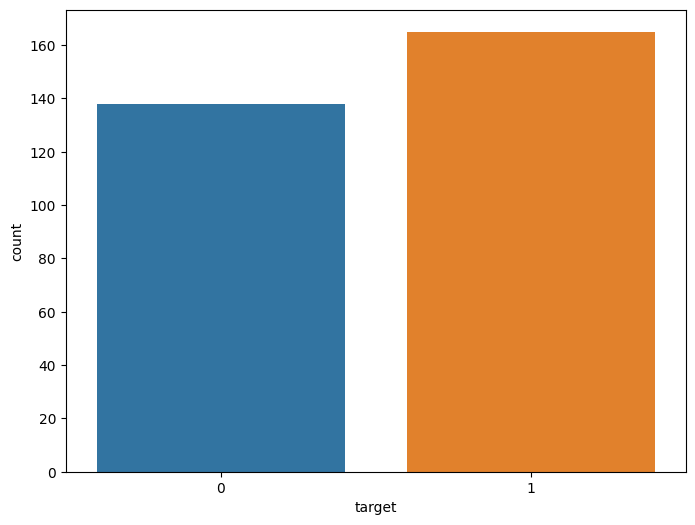

In [7]:
# Countplot of the target variable
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

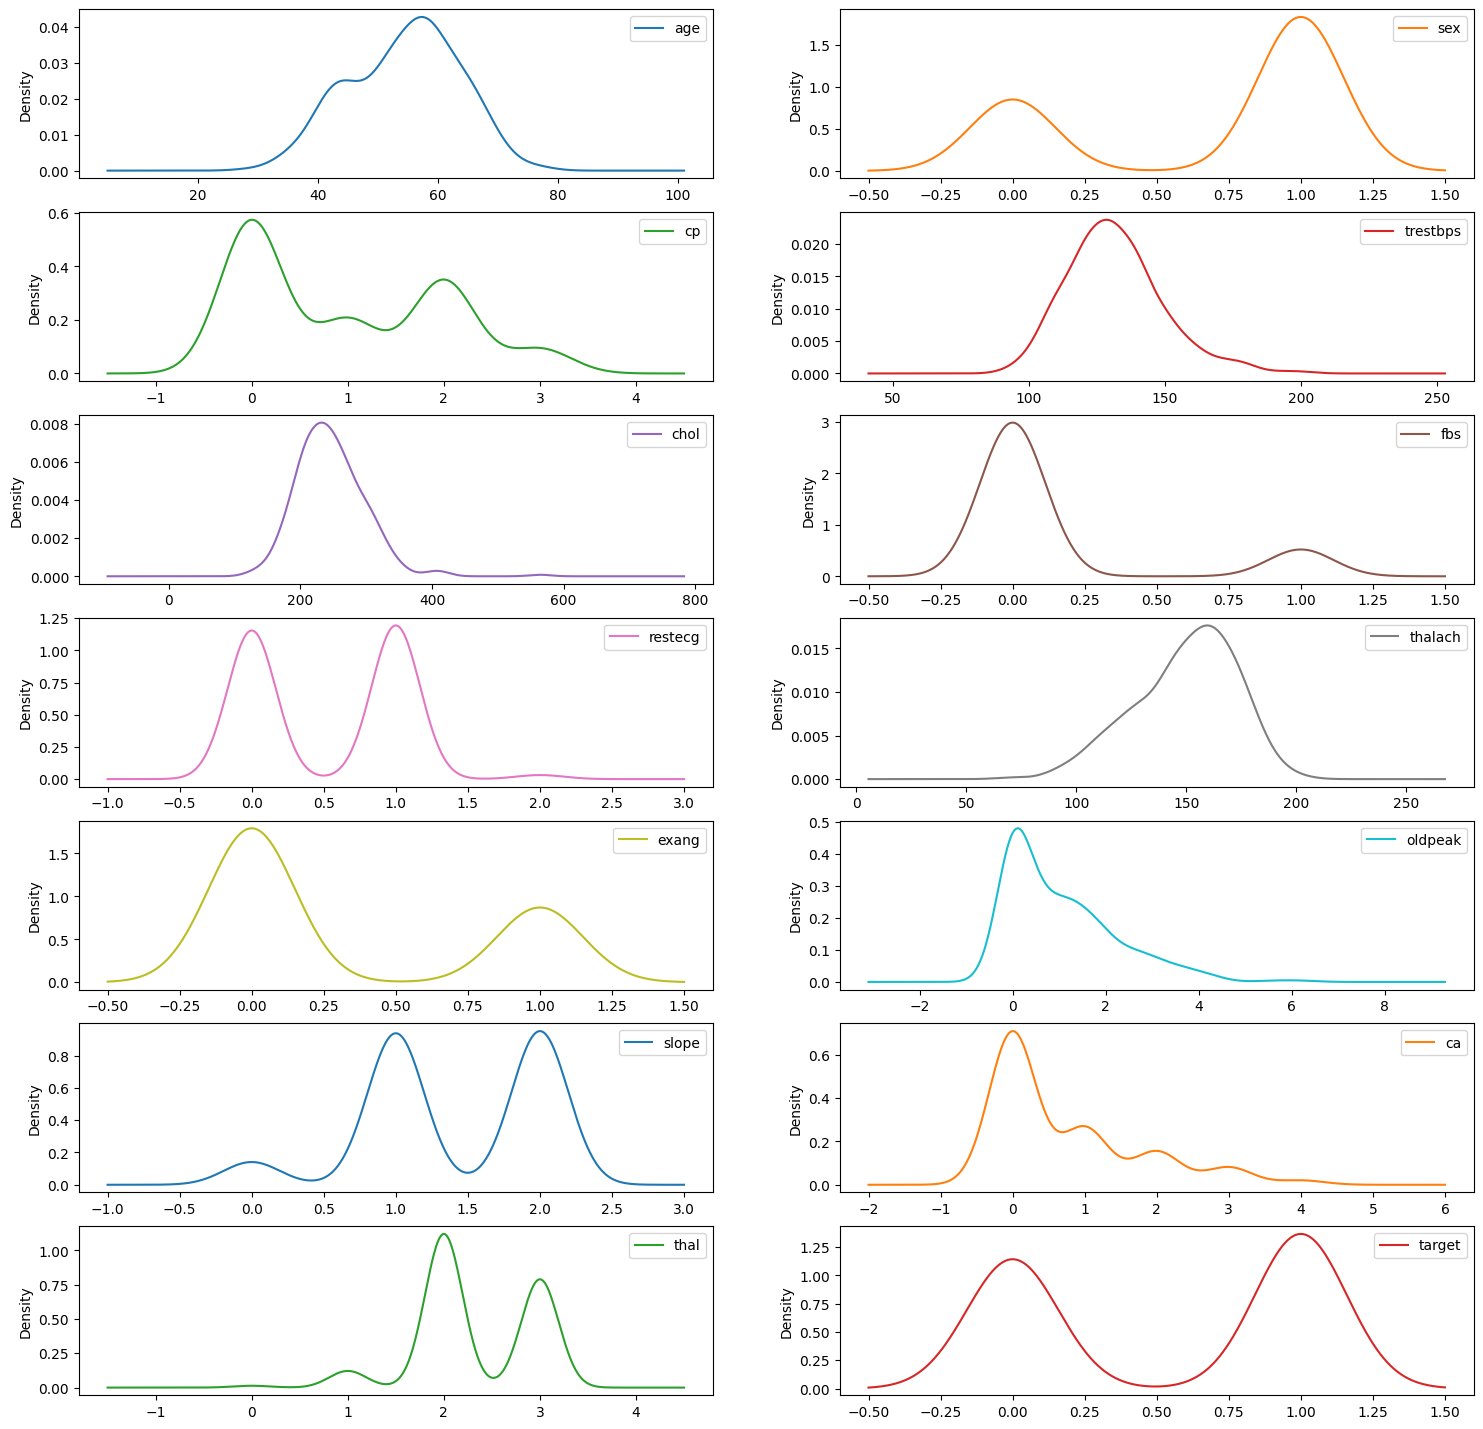

In [8]:
# Density plots
df.plot(kind='density', subplots=True, layout=(7,2), sharex=False , figsize =(18,18))
plt.show()

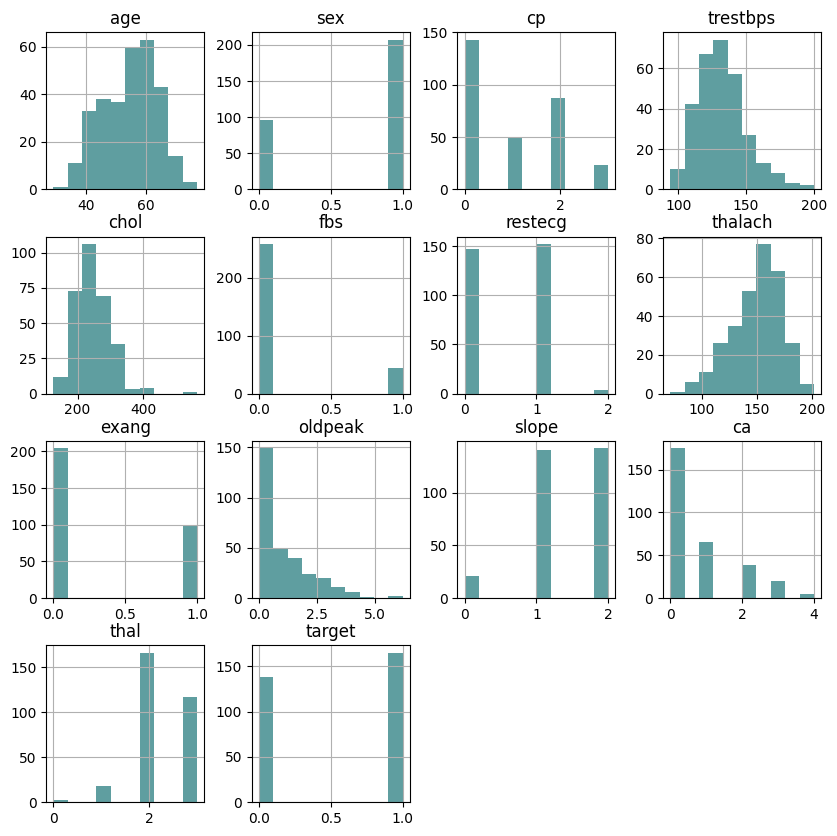

In [9]:
# Histograms
df.hist(figsize=(10,10), color="#5F9EA0")
plt.show()

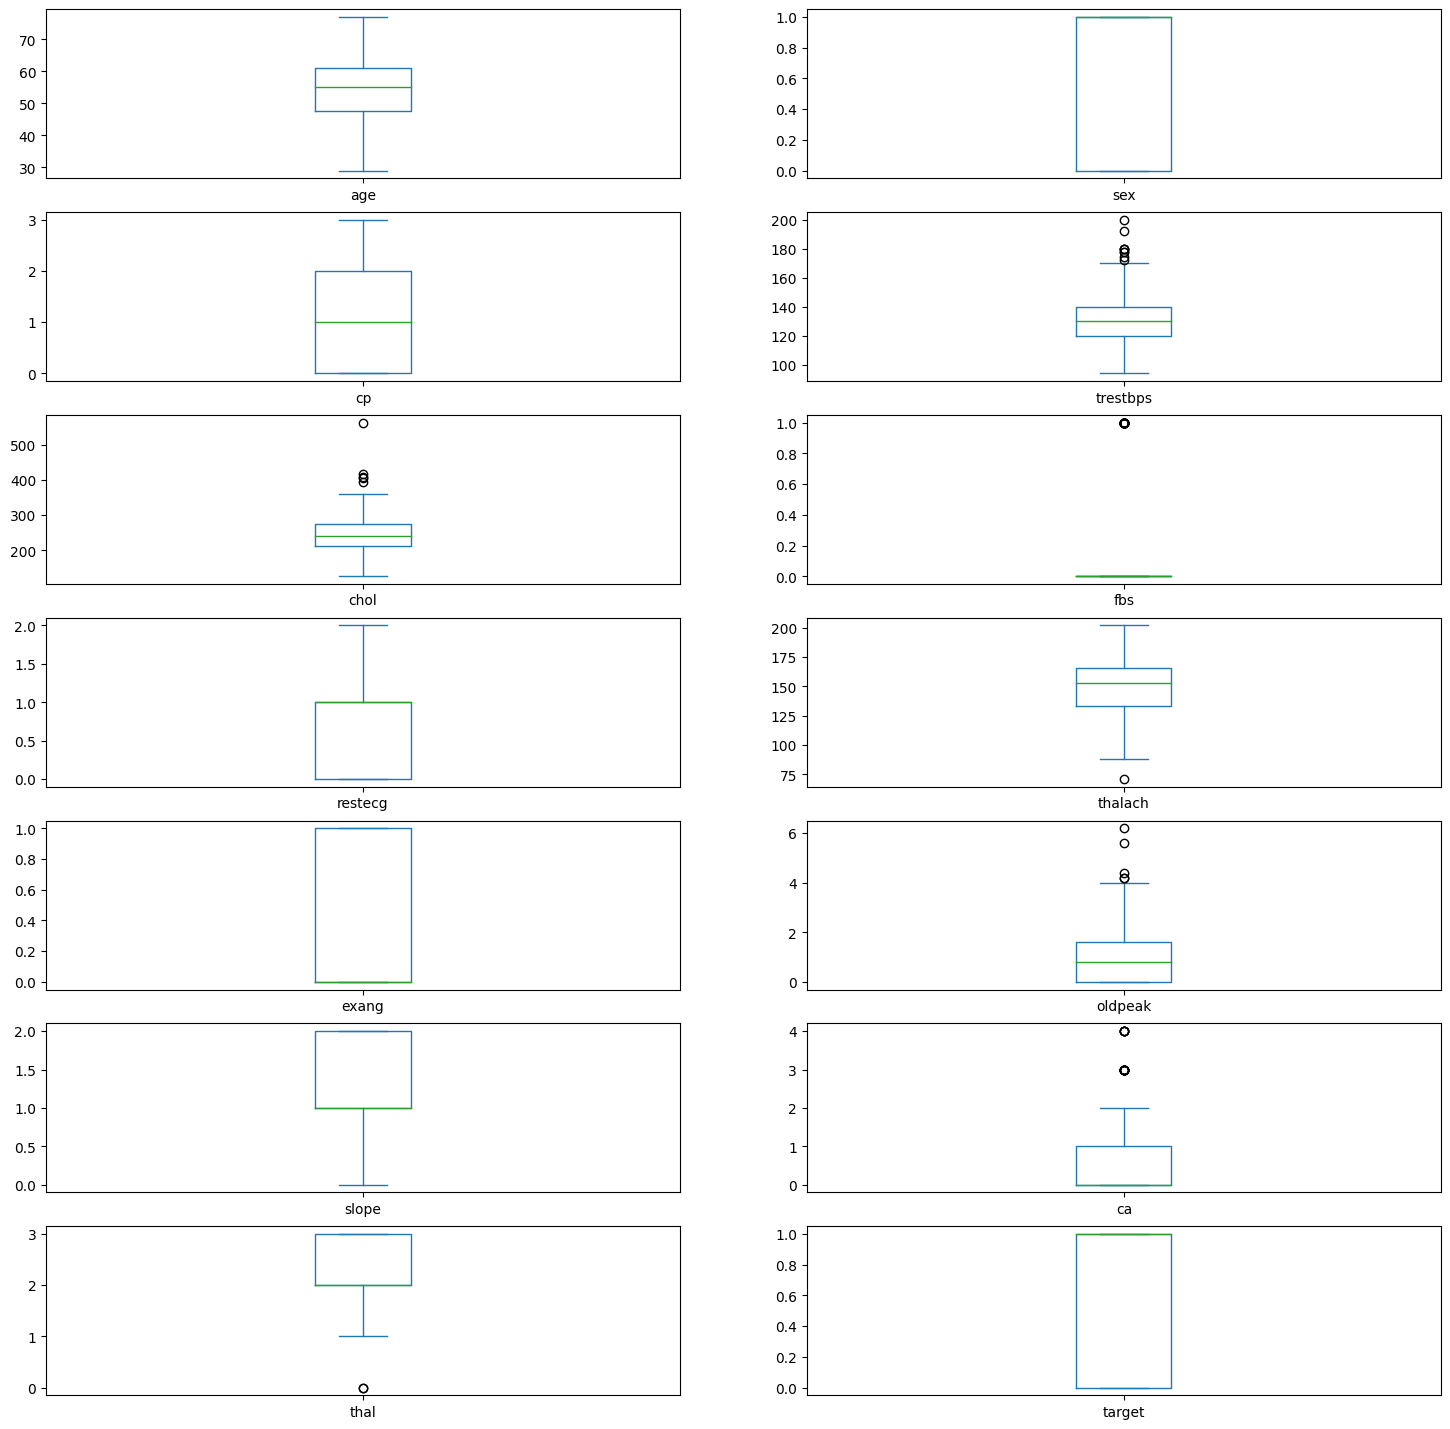

In [10]:
# Box plots
df.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False ,figsize=(18,18))
plt.show()


In [11]:
# Correlation matrix
correlation = df.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


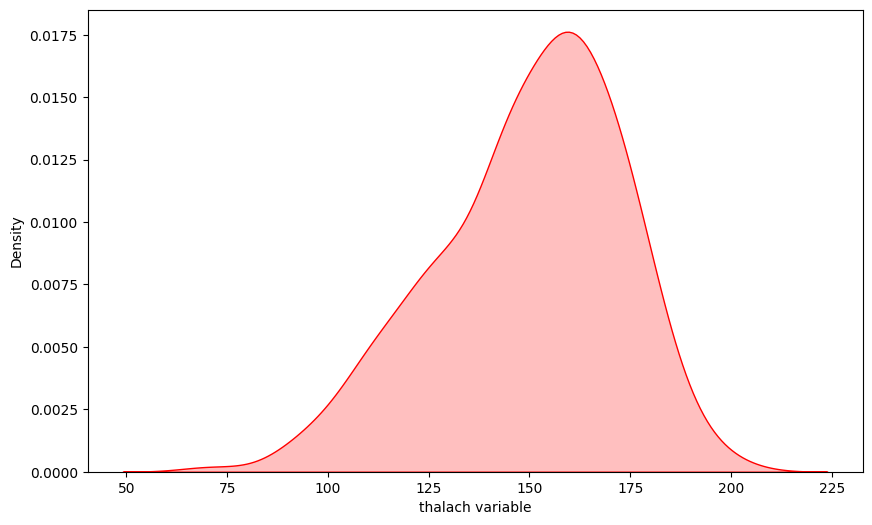

In [12]:
# KDE plot for 'thalach'
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

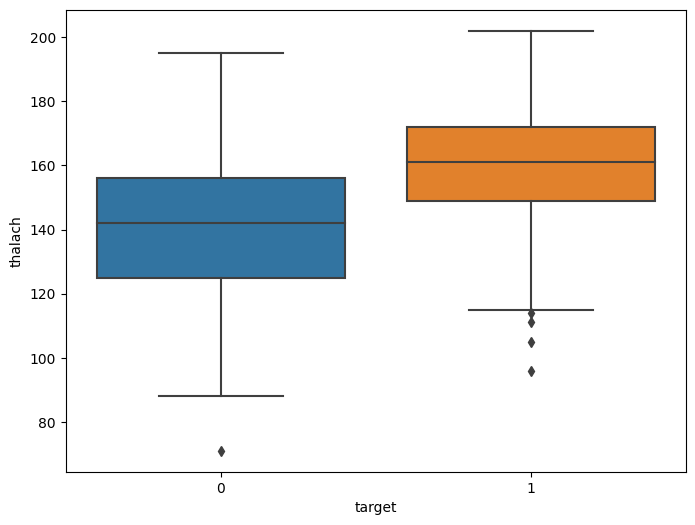

In [13]:
 # Box plot for 'thalach' vs 'target'
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

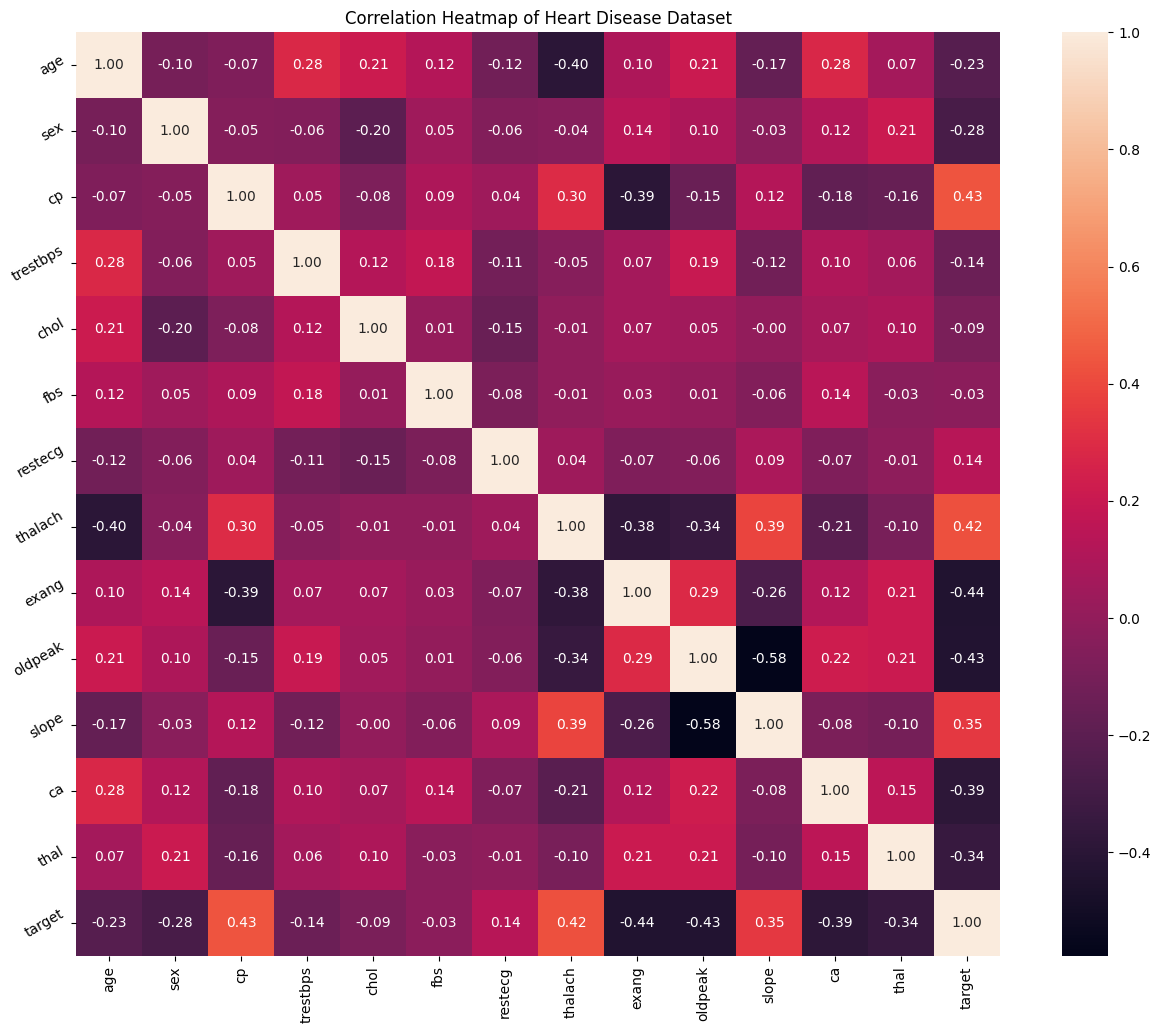

In [14]:
# Correlation heatmap
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

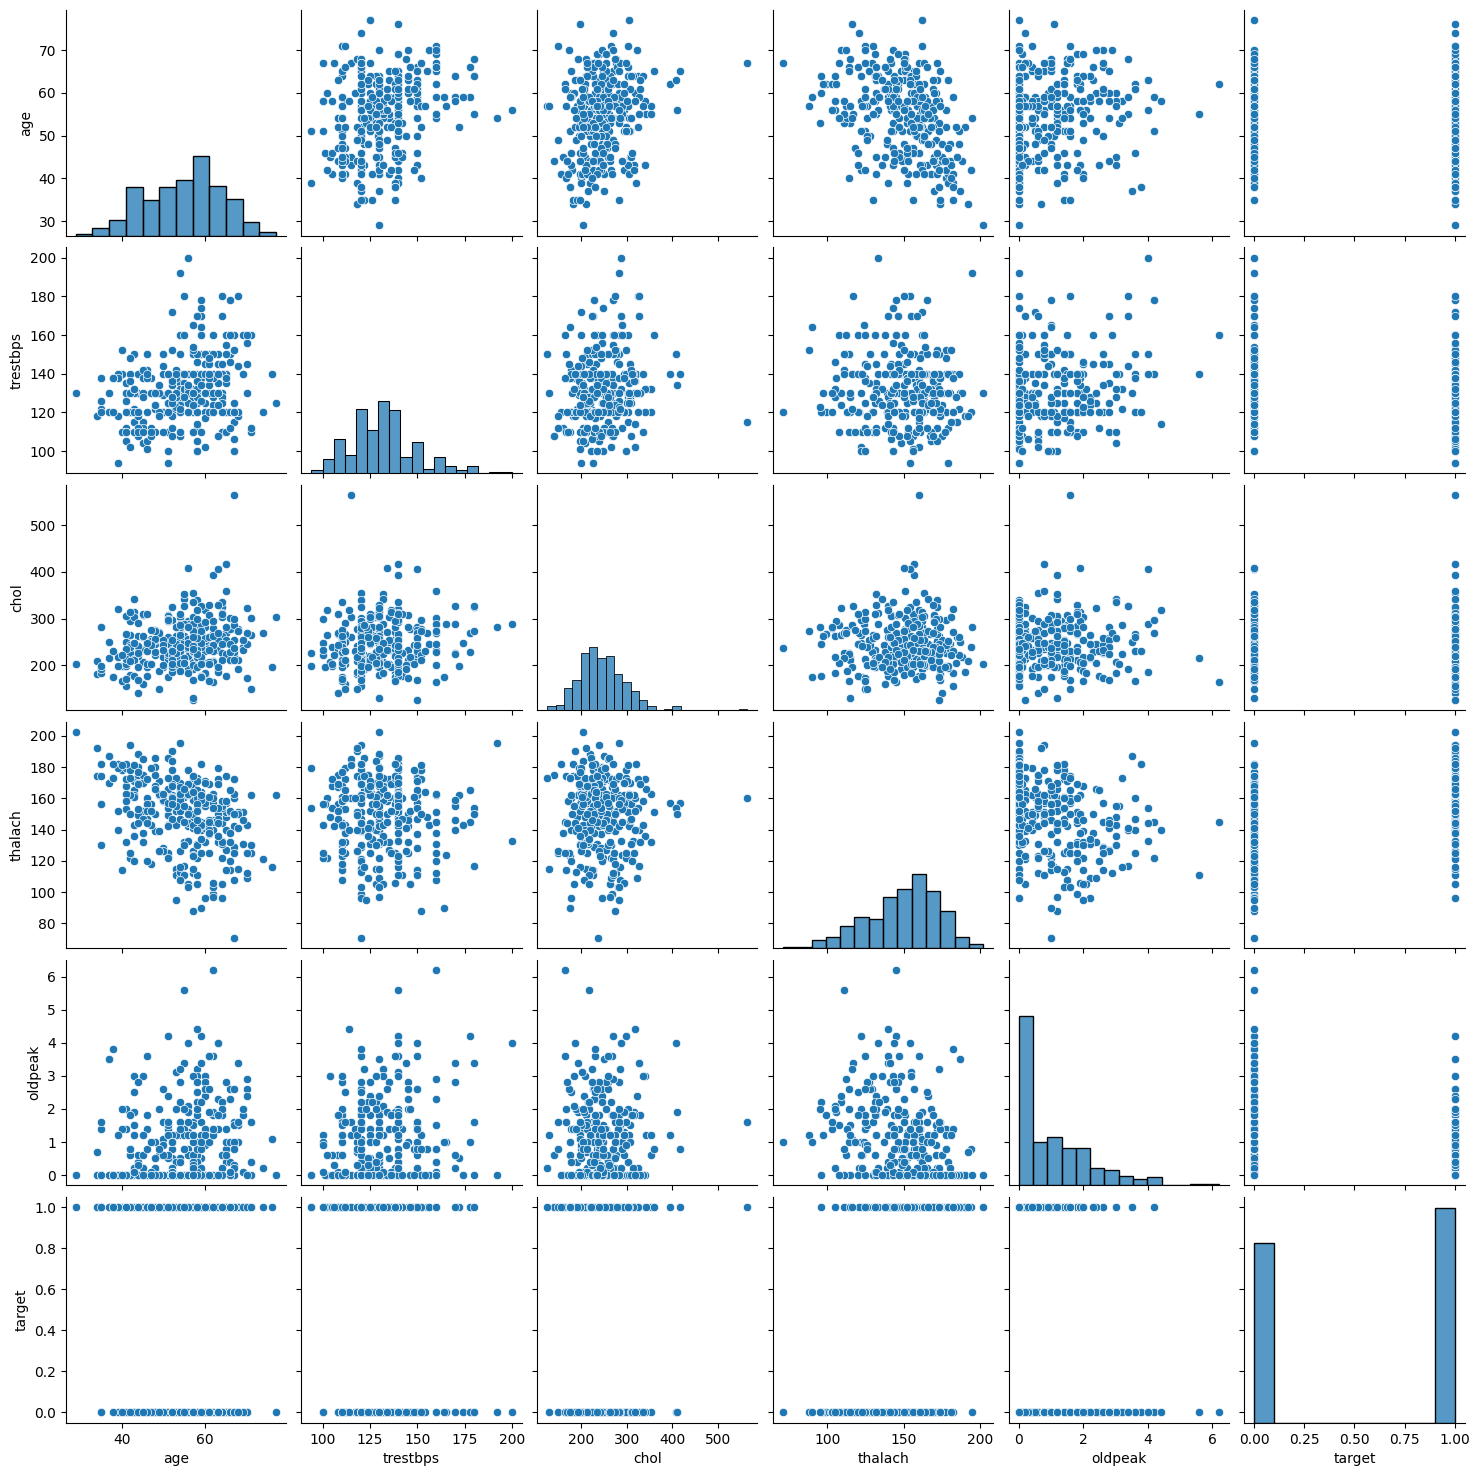

In [15]:
# Pairplot for numerical variables
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()


<ipython-input-16-ed5562e12ce2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10)


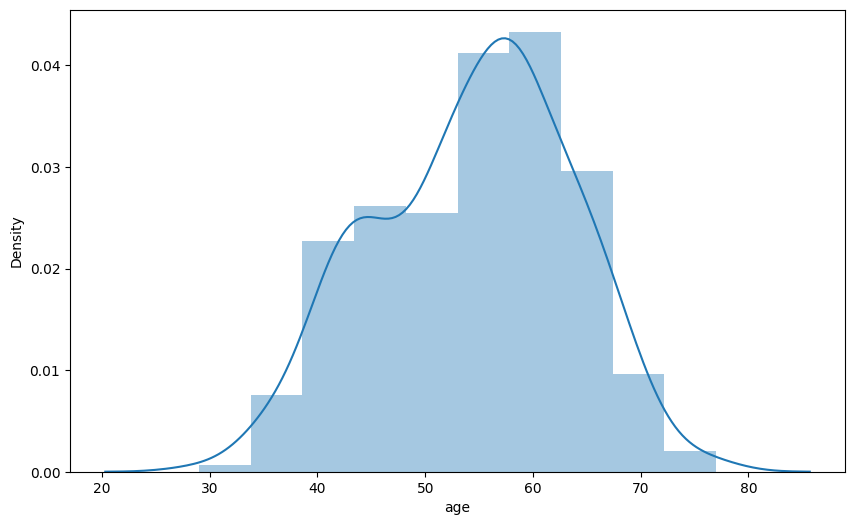

In [16]:
# Distribution plot for 'age'
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

In [17]:
# Machine Learning Models code
# Assuming 'target' is the column you want to predict
X = df.drop('target', axis=1)
y = df['target']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create a list of classifiers (traditional machine learning models)
classifiers = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    MLPClassifier(random_state=42)
]

In [23]:
# Dictionary to store evaluation metrics
metrics_dict = {}

# Loop through each classifier, train, predict, and evaluate
for clf in classifiers:
    model_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    metrics_dict[model_name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': roc_auc
    }

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {roc_auc:.2f}\n")

RandomForestClassifier Metrics:
Accuracy: 0.84
Sensitivity: 0.84
Specificity: 0.83
AUC: 0.84

GradientBoostingClassifier Metrics:
Accuracy: 0.77
Sensitivity: 0.75
Specificity: 0.79
AUC: 0.77

LogisticRegression Metrics:
Accuracy: 0.89
Sensitivity: 0.91
Specificity: 0.86
AUC: 0.88

SVC Metrics:
Accuracy: 0.70
Sensitivity: 0.88
Specificity: 0.52
AUC: 0.70

KNeighborsClassifier Metrics:
Accuracy: 0.69
Sensitivity: 0.75
Specificity: 0.62
AUC: 0.69

GaussianNB Metrics:
Accuracy: 0.87
Sensitivity: 0.84
Specificity: 0.90
AUC: 0.87

DecisionTreeClassifier Metrics:
Accuracy: 0.75
Sensitivity: 0.66
Specificity: 0.86
AUC: 0.76



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier Metrics:
Accuracy: 0.80
Sensitivity: 0.75
Specificity: 0.86
AUC: 0.81

XGBClassifier Metrics:
Accuracy: 0.82
Sensitivity: 0.78
Specificity: 0.86
AUC: 0.82

MLPClassifier Metrics:
Accuracy: 0.87
Sensitivity: 0.91
Specificity: 0.83
AUC: 0.87



In [24]:
# Deep Learning Models code
# Create a list of deep learning models
dl_models = [
    Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-64-1'),
    Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-128-64-1'),
    Sequential([
        Dense(256, input_dim=X_train.shape[1], activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-256-128-64-1'),
    Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-64-Dropout-0.3-32-1'),
    Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-32-64-128-1'),
    Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-128-Dropout-0.5-64-1'),
    Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-64-64-64-1'),
    Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-32-64-1'),
    Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-128-1'),
    Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name='Dense-64-32-1')
]



In [25]:
for model in dl_models:
    model_name = model.__class__.__name__
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    metrics_dict[model_name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': roc_auc
    }

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {roc_auc:.2f}\n")


2/2 [==============================] - 0s 5ms/step
Sequential Metrics:
Accuracy: 0.77
Sensitivity: 0.66
Specificity: 0.90
AUC: 0.83

2/2 [==============================] - 0s 4ms/step
Sequential Metrics:
Accuracy: 0.77
Sensitivity: 0.94
Specificity: 0.59
AUC: 0.91

2/2 [==============================] - 0s 5ms/step
Sequential Metrics:
Accuracy: 0.85
Sensitivity: 0.81
Specificity: 0.90
AUC: 0.90

2/2 [==============================] - 0s 5ms/step
Sequential Metrics:
Accuracy: 0.74
Sensitivity: 0.81
Specificity: 0.66
AUC: 0.82



2/2 [==============================] - 0s 5ms/step
Sequential Metrics:
Accuracy: 0.62
Sensitivity: 0.94
Specificity: 0.28
AUC: 0.84



2/2 [==============================] - 0s 4ms/step
Sequential Metrics:
Accuracy: 0.48
Sensitivity: 0.00
Specificity: 1.00
AUC: 0.85

2/2 [==============================] - 0s 6ms/step
Sequential Metrics:
Accuracy: 0.75
Sensitivity: 0.69
Specificity: 0.83
AUC: 0.83

2/2 [==============================] - 0s 6ms/step
Sequential Metrics:
Accuracy: 0.84
Sensitivity: 0.81
Specificity: 0.86
AUC: 0.86

2/2 [==============================] - 0s 4ms/step
Sequential Metrics:
Accuracy: 0.84
Sensitivity: 0.91
Specificity: 0.76
AUC: 0.91

2/2 [==============================] - 0s 6ms/step
Sequential Metrics:
Accuracy: 0.72
Sensitivity: 0.91
Specificity: 0.52
AUC: 0.89



In [26]:
# Display the best model for each metric
best_model_accuracy = max(metrics_dict, key=lambda x: metrics_dict[x]['Accuracy'])
best_model_sensitivity = max(metrics_dict, key=lambda x: metrics_dict[x]['Sensitivity'])
best_model_specificity = max(metrics_dict, key=lambda x: metrics_dict[x]['Specificity'])
best_model_auc = max(metrics_dict, key=lambda x: metrics_dict[x]['AUC'])

print(f"\nBest Model for Accuracy: {best_model_accuracy} with Accuracy {metrics_dict[best_model_accuracy]['Accuracy']:.2f}")
print(f"Best Model for Sensitivity: {best_model_sensitivity} with Sensitivity {metrics_dict[best_model_sensitivity]['Sensitivity']:.2f}")
print(f"Best Model for Specificity: {best_model_specificity} with Specificity {metrics_dict[best_model_specificity]['Specificity']:.2f}")
print(f"Best Model for AUC: {best_model_auc} with AUC {metrics_dict[best_model_auc]['AUC']:.2f}")


Best Model for Accuracy: LogisticRegression with Accuracy 0.89
Best Model for Sensitivity: LogisticRegression with Sensitivity 0.91
Best Model for Specificity: GaussianNB with Specificity 0.90
Best Model for AUC: Sequential with AUC 0.89
